<div style='background-color: #72b356; color: #ffffff; padding: 20px 40px; text-align: center;'>
    <h1 style='font-size: 42px; padding: 0px; margin: 0px; margin-bottom: 5px;'>Project</h1>
    <h2 style='font-size: 24px; padding: 0px; margin: 0px;'>MODS202 - Econometrics (S1-P1)</h2>
    <h3 style='font-size: 12px;'>Mauro Parafati <span style="font-style: italic;">(mauro.parafati at telecom-paris.fr)</span></h3>
    <h3 style='font-size: 12px;'>Rodrigo Calzada <span style="font-style: italic;">(rodrigo.calzada at telecom-paris.fr)</span></h3>
</div>

<div style='background-color: #ffffff; color: #72b356; border: 5px solid #72b356; padding: 20px 40px;'>
    <h1 style='font-size: 32px; padding: 0px; margin: 0px;'>Table of Contents</h1>
</div>

* [Setup](#Setup)
* [Part 1: Regression](#Part-1)
    * [Statement](./Part_1.pdf)
    * Questions: [1.1](#Question-1.1), [1.2](#Question-1.2), [1.3](#Question-1.3), [1.4](#Question-1.4), [1.5](#Question-1.5), [1.6](#Question-1.6), [1.7](#Question-1.7), [1.8](#Question-1.8), [1.9](#Question-1.9), [1.10](#Question-1.10), [1.11](#Question-1.11), [1.12](#Question-1.12), [1.13](#Question-1.13), [1.14](#Question-1.14), [1.15](#Question-1.15), [1.16](#Question-1.16).
* [Part 2: Time series](#Part-2)
    * [Statement](./Part_2.pdf)
    * Questions: [2.1](#Question-2.1), [2.2](#Question-2.2), [2.3](#Question-2.3), [2.4](#Question-2.4), [2.5](#Question-2.5), [2.6](#Question-2.6), [2.7](#Question-2.7), [2.8](#Question-2.8), [2.9](#Question-2.9), [2.10](#Question-2.10), [2.11](#Question-2.11).

<div style='background-color: #ffffff; color: #3b3b3b; border: 5px solid #3b3b3b; padding: 20px 40px;'>
    <h1 style='font-size: 32px; padding: 0px; margin: 0px;'>Setup</h1>
</div>

<h3 style='color: #3b3b3b;'>Imports</h3>

In [217]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf 
from statsmodels.tsa.ar_model import ar_select_order as ARSelectOrder
from statsmodels.tsa.api import AutoReg
from statsmodels.stats.outliers_influence import variance_inflation_factor
from scipy.stats import t, f

<h3 style='color: #3b3b3b;'>Libraries</h3>

In [218]:
!pip install xlrd

Defaulting to user installation because normal site-packages is not writeable

[notice] A new release of pip available: 22.2.2 -> 22.3.1
[notice] To update, run: python3 -m pip install --upgrade pip


<h3 style='color: #3b3b3b;'>Constants</h3>

In [219]:
FILEPATH_1 = 'MROZ.txt'
FILEPATH_2 = 'quarterly.xls'

<div style='background-color: #ffffff; color: #026be3; border: 5px solid #026be3; padding: 20px 40px;'>
    <h1 style='font-size: 32px; padding: 0px; margin: 0px; margin-bottom: 5px;'>Part 1</h1>
    <h2 style='font-size: 20px; padding: 0px; margin: 0px; font-style: italic;'>Regression</h2>
</div>

*[Click here](./Part_1.pdf) to open the statement provided by the teacher*

<h3 style='color: #026be3;'>Question 1.1</h3>
<h4 style='color: #026be3;'>Lire le fichier mroz.txt. Ne sélectionner que les observations pour lesquelles la variable wage est strictement positive.</h4>

In [220]:
df = pd.read_csv(FILEPATH_1, delim_whitespace=True, header=None, names=[
    "inlf",
    "hours",
    "kidslt6",
    "kidsge6",
    "age",
    "educ",
    "wage",
    "repwage",
    "hushrs",
    "husage",
    "huseduc",
    "huswage",
    "faminc",
    "mtr",
    "motheduc",
    "fatheduc",
    "unem",
    "city",
    "exper",
    "nwifeinc",
    "lwage",
    "expersq"
])
df = df.loc[df.wage != '.']
df.wage = df.wage.astype(float)
df.huswage = df.huswage.astype(float)

In [221]:
# Variable wage > 0
df = df[df.wage > 0]

In [222]:
df.head()

,inlf,hours,kidslt6,kidsge6,age,educ,wage,repwage,hushrs,husage,...,faminc,mtr,motheduc,fatheduc,unem,city,exper,nwifeinc,lwage,expersq
0,1,1610,1,0,32,12,3.3540,2.65,2708,34,...,16310,0.7215,12,7,5.0,0,14,10.910060,1.210154,196
1,1,1656,0,2,30,12,1.3889,2.65,2310,30,...,21800,0.6615,7,7,11.0,1,5,19.499980,.3285121,25
2,1,1980,1,3,35,12,4.5455,4.04,3072,40,...,21040,0.6915,12,7,5.0,0,15,12.039910,1.514138,225
3,1,456,0,3,34,12,1.0965,3.25,1920,53,...,7300,0.7815,7,7,5.0,0,6,6.799996,.0921233,36
4,1,1568,1,2,31,14,4.5918,3.60,2000,32,...,27300,0.6215,12,14,9.5,1,7,20.100060,1.524272,49


In [223]:
n = df.shape[0]

<h3 style='color: #026be3;'>Question 1.2</h3>
<h4 style='color: #026be3;'>Faire les statistiques descriptives du salaire, de l’age et de l’éducation pour l’ensemble des femmes puis, pour les femmes dont le salaire du mari est supérieure à la médiane de l’échantillon, puis pour les femmes dont le salaire du mari est inférieur à la médiane de l’échantillon.</h4>

For **every women**:

In [224]:
# Wage
df.wage.describe()

count    428.000000
mean       4.177682
std        3.310282
min        0.128200
25%        2.262600
50%        3.481900
75%        4.970750
max       25.000000
Name: wage, dtype: float64

In [225]:
# Age
df.age.describe()

count    428.000000
mean      41.971963
std        7.721084
min       30.000000
25%       35.000000
50%       42.000000
75%       47.250000
max       60.000000
Name: age, dtype: float64

In [226]:
# Education
df.educ.describe()

count    428.000000
mean      12.658879
std        2.285376
min        5.000000
25%       12.000000
50%       12.000000
75%       14.000000
max       17.000000
Name: educ, dtype: float64

For **women whose husband has a lower wage than the median:**

In [227]:
df_husb_lower_med = df.loc[df.huswage < df.huswage.median()]

In [228]:
# Wage
df_husb_lower_med.wage.describe()

count    214.000000
mean       3.458541
std        2.143274
min        0.128200
25%        2.117275
50%        2.971800
75%        4.393800
max       18.267000
Name: wage, dtype: float64

In [229]:
# Age
df_husb_lower_med.age.describe()

count    214.000000
mean      41.668224
std        8.045482
min       30.000000
25%       35.000000
50%       41.000000
75%       47.000000
max       60.000000
Name: age, dtype: float64

In [230]:
# Education
df_husb_lower_med.educ.describe()

count    214.000000
mean      12.074766
std        2.054200
min        6.000000
25%       12.000000
50%       12.000000
75%       12.000000
max       17.000000
Name: educ, dtype: float64

For **women whose husband has a higher wage than the median:**

In [231]:
df_husb_higher_med = df.loc[df.huswage > df.huswage.median()]

In [232]:
# Wage
df_husb_higher_med.wage.describe()

count    214.000000
mean       4.896822
std        4.041606
min        0.161600
25%        2.513850
50%        3.846400
75%        5.854125
max       25.000000
Name: wage, dtype: float64

In [233]:
# Age
df_husb_higher_med.age.describe()

count    214.000000
mean      42.275701
std        7.388843
min       30.000000
25%       36.000000
50%       43.000000
75%       48.000000
max       59.000000
Name: age, dtype: float64

In [234]:
# Education
df_husb_higher_med.educ.describe()

count    214.000000
mean      13.242991
std        2.359045
min        5.000000
25%       12.000000
50%       12.000000
75%       16.000000
max       17.000000
Name: educ, dtype: float64

For analysis purposes, we can see the **mean values** in this table:

| Variable | Husband wins less | All data | Husband wins more |
|----------|-------------------|----------|-------------------|
| Wage | 3.45 | 4.17 | 4.89 |
| Age | 41.66 | 41.97 | 42.27 |
| Education | 12.07 | 12.65 | 13.24 |

We can see that, as could be expected, the wage for women whose husbund wins more than the median, is (in average) greater than the wage for women whose husband wins less.

For **age** and **education** we can also constate a positive correlation, but not as strong as in the wage case.

<h3 style='color: #026be3;'>Question 1.3</h3>
<h4 style='color: #026be3;'>Faire l'histogramme de la variable wage. Calculer le log de wage et faire l'histogramme. Comparez les deux histogrammes et commentez.</h4>

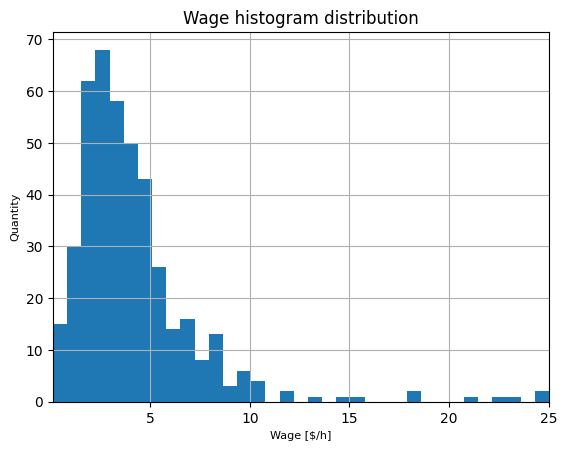

In [235]:
plt.hist(df.wage, bins='auto')
plt.title("Wage histogram distribution", fontsize=12)
plt.xlabel("Wage [$/h]", fontsize=8)
plt.ylabel("Quantity", fontsize=8)
plt.xlim(df.wage.min(), df.wage.max())
plt.grid()
plt.show()

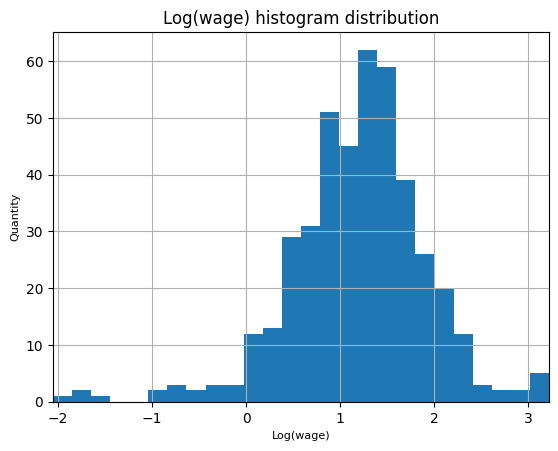

In [236]:
log_wage = np.log(df.wage)
plt.hist(log_wage, bins='auto')
plt.title("Log(wage) histogram distribution", fontsize=12)
plt.xlabel("Log(wage)", fontsize=8)
plt.ylabel("Quantity", fontsize=8)
plt.xlim(log_wage.min(), log_wage.max())
plt.grid()
plt.show()

We can see that when we apply the log function, the distribution looks more like a **Normal distribution**, while without this transformation it's more similar to a **Chi-squared**. We usually prefer to work and do analysis with normal distributions.

<h3 style='color: #026be3;'>Question 1.4</h3>
<h4 style='color: #026be3;'>Calculer les corrélations motheduc et fatheduc. Commentez. Il y a-t-il un problème de multicollinéarité si l'on utilise ces variables comme variables explicatives ?</h4>

In [237]:
corr = np.corrcoef(df.motheduc, df.fatheduc)
corr[0][1]

0.5540632184311677

This value is significant (is higher than 0.5), so yes, we would have a multicolinearity problem if we choose these variables for fitting a model. The problem is that a part of the information that one of them is adding to the model can be deduced as a linear combination of the another one!

<h3 style='color: #026be3;'>Question 1.5</h3>
<h4 style='color: #026be3;'>Faites un graphique en nuage de point entre wage et educ, wage et exper, wage et fatheduc. Commentez. S'agit-il d'un effet "toute chose étant égale par ailleurs ?"</h4>

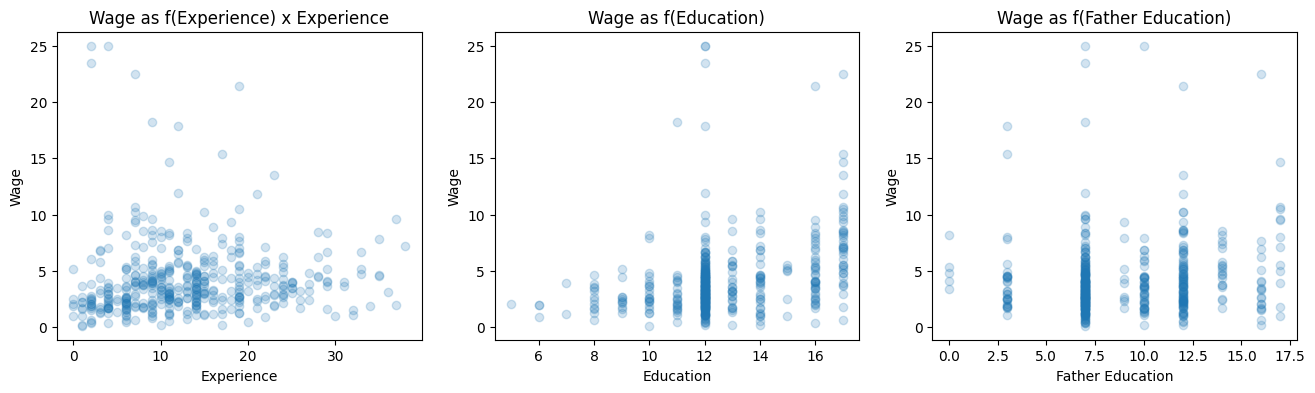

In [238]:
plt.figure(figsize=(16,4))

plt.subplot(1, 3, 1)
plt.scatter(df.exper, df.wage, alpha=0.2)
plt.title('Wage as f(Experience) x Experience')
plt.xlabel('Experience')
plt.ylabel('Wage')

plt.subplot(1, 3, 2)
plt.scatter(df.educ, df.wage, alpha=0.2)
plt.title('Wage as f(Education)')
plt.xlabel('Education')
plt.ylabel('Wage')

plt.subplot(1, 3, 3)
plt.scatter(df.fatheduc, df.wage, alpha=0.2)
plt.title('Wage as f(Father Education)')
plt.xlabel('Father Education')
plt.ylabel('Wage')

plt.show()

No, we cannot say that this effect is being fulfilled, since in each case we have influence of a lot of other variables as well that is not being shown in these graphs, hence cannot be studied using them.

<h3 style='color: #026be3;'>Question 1.6</h3>
<h4 style='color: #026be3;'>Quelle est l'hypothèse fondamentale qui garantit des estimateurs non biaisés ? Expliquer le biais de variable omise.</h4>

The fundamental hypothesis to have unbiased estimators is that the unobserved variables (not included in the model) have zero expectation. That is to say that X and u are uncorrelated:

$$\mathbb{E}(u|x) = \mathbb{E}(u) = 0$$

The omitted variable biased happens when we don't include a variable in the model that was correlated with both the error and the studied variable, meaning that we are losing a significant information in the model.

<h3 style='color: #026be3;'>Question 1.7</h3>
<h4 style='color: #026be3;'>Faire la régression de wage en utilisant les variables explicatives un constante, city, educ, exper, nwifeinc, kidslt6, kidsge6. Commentez l'histogramme des résidus.</h4>

In [239]:
y = df.wage
const = np.ones(n)
X = np.column_stack((const, df.city, df.educ, df.exper, df.nwifeinc, df.kidslt6, df.kidsge6))
model = sm.OLS(y, X)
result = model.fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                   wage   R-squared:                       0.127
Model:                            OLS   Adj. R-squared:                  0.115
Method:                 Least Squares   F-statistic:                     10.23
Date:                Sun, 11 Dec 2022   Prob (F-statistic):           1.41e-10
Time:                        06:24:45   Log-Likelihood:                -1090.0
No. Observations:                 428   AIC:                             2194.
Df Residuals:                     421   BIC:                             2222.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -2.4035      0.963     -2.495      0.0

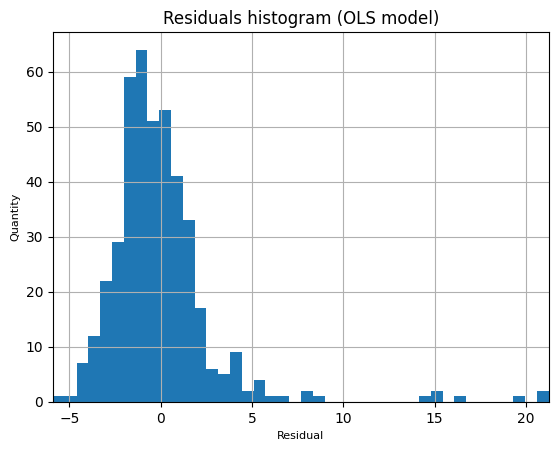

In [240]:
res = result.resid
plt.hist(res, bins='auto')
plt.title("Residuals histogram (OLS model)", fontsize=12)
plt.xlabel("Residual", fontsize=8)
plt.ylabel("Quantity", fontsize=8)
plt.xlim(res.min(), res.max())
plt.grid()
plt.show()

We can see that the residuals seems to follow a **gaussian distribution**. This result is completely logical since this is what the OLS method is about! We can also observe some bigger values on the rightside of the graph. We can check the main descriptive statistics as well:

In [241]:
print(f"Mean: {res.mean()}")
print(f"Standard deviation: {res.std()}")

Mean: 4.482395762972594e-16
Standard deviation: 3.0925662779462173


As we can see, the mean is almost 0, but we have a high std.

<h3 style='color: #026be3;'>Question 1.8</h3>
<h4 style='color: #026be3;'>Faire la régrssion de lwage sur une constante, city, educ, exper, nwifeinc, kidslt6, kidsge6. Comparer l’histogramme obtenu à celui de la question 7.</h4>

In [273]:
y = log_wage
X = np.column_stack((const, df.city, df.educ, df.exper, df.nwifeinc, df.kidslt6, df.kidsge6))
model = sm.OLS(y, X)
result = model.fit()
SSR0 = result.ssr
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                   wage   R-squared:                       0.156
Model:                            OLS   Adj. R-squared:                  0.144
Method:                 Least Squares   F-statistic:                     12.92
Date:                Sun, 11 Dec 2022   Prob (F-statistic):           2.00e-13
Time:                        06:48:07   Log-Likelihood:                -431.92
No. Observations:                 428   AIC:                             877.8
Df Residuals:                     421   BIC:                             906.3
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.3990      0.207     -1.927      0.0

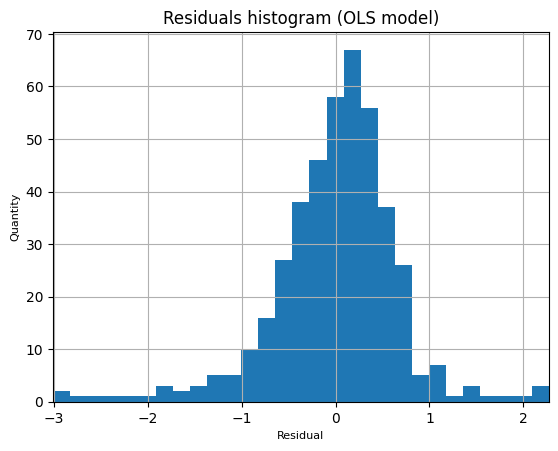

In [274]:
res = result.resid
plt.hist(res, bins='auto')
plt.title("Residuals histogram (OLS model)", fontsize=12)
plt.xlabel("Residual", fontsize=8)
plt.ylabel("Quantity", fontsize=8)
plt.xlim(res.min(), res.max())
plt.grid()
plt.show()

In [275]:
print(f"Mean: {res.mean()}")
print(f"Standard deviation: {res.std()}")

Mean: -4.897432407692279e-16
Standard deviation: 0.664577084083108


The mean is again approximately 0, but this time **the standard deviation is significantly smaller** and closer to 1 (which means, much closer to a $\mathcal{N}(0, 1)$).

<h3 style='color: #026be3;'>Question 1.9</h3>
<h4 style='color: #026be3;'>Tester l'hypothèse de non significativité de nwifeinc avec un seuil de significativité de 1%, 5% et 10% (test alternatif des deux côtés). Commentez les p-values.</h4>

From the summary of the results in [Question 1.8](#Question-1.8), we get:

In [276]:
print(f"t-value: {result.tvalues[4]}")
print(f"p-value: {result.pvalues[4]}")

t-value: 1.4659517416241563
p-value: 0.14340791214518347


$$\text{t-statistic} \approx 1.466$$
$$\text{p-value} \approx 0.143$$

So we can inmediately say that **we cannot reject the null hypothesis** at those confidence levels. We would reject H0 at a confidence greater than $14.3\%$

<h3 style='color: #026be3;'>Question 1.10</h3>
<h4 style='color: #026be3;'>Tester l’hypothèse que le coefficient associé à nwifeinc est égal à 0.01 avec un seuil de significativité de 5% (test à alternatif des deux côtés)</h4>

$$H_0 : B_{\text{nwifeinc}} = 0.01, \quad \alpha = 5\%$$

In [277]:
expected = 0.01
coef = result.params[4]
std = result.bse[4]
alpha = 0.05

t_value = abs((coef - expected ) / std)
print(f"t-value: {t_value}")
c = t.ppf(1 - alpha, result.df_resid)
print(f"c value (for alpha = {alpha}): {c}")

t-value: 1.536388784674496
c value (for alpha = 0.05): 1.6484810571255268


We cannot reject H0 at a confidence level of $5\%$.

<h3 style='color: #026be3;'>Question 1.11</h3>
<h4 style='color: #026be3;'>Tester l’hypothèse jointe que le coefficient de nwifeinc est égal à 0.01 et que celui de city est égal à 0.05.</h4>

$$H_0 : B_{\text{nwifeinc}} = 0.01, B_{\text{city}} = 0.05, \quad \alpha = 5\%$$

We need to use a F-statistic, building our restricted model and using the unrestricted model from [Question 1.8](#Question-1.8):

In [278]:
# Unrestricted model from 1.8
print(f"SSR for unrestricted model: {SSR0}")

# Restricted model
X_r = np.column_stack((const, df.educ, df.exper, df.kidslt6, df.kidsge6))
y_r = y - 0.01 * df.nwifeinc - 0.05 * df.city
model_r = sm.OLS(y_r, X_r)
result_r = model_r.fit()
SSR1 = result_r.ssr
print(f"SSR for restricted model: {SSR1}")

SSR for unrestricted model: 188.58997319394948
SSR for restricted model: 189.7878735132976


In [301]:
alpha = 0.05
k_ur = X.shape[1]
k_r = X_r.shape[1]
q = k_ur - k_r

F = ((SSR1 - SSR0) / q) / (SSR0 / (n - k_r))
print(f"F-statistic: {F}")
c = f.ppf(1 - alpha, q, n - k_r)
print(f"c value (for alpha = {alpha}): {c}")

F-statistic: 1.343421992438441
c value (for alpha = 0.05): 3.0170489027887557


So, as $F < c$, we cannot reject H0 at a confidence level of $\alpha = 5\%$

<h3 style='color: #026be3;'>Question 1.12</h3>
<h4 style='color: #026be3;'>Faites une représentation graphique de la manière dont le salaire augmente avec l’éducation et l’expérience professionnelle. Commentez.</h4>

<h3 style='color: #026be3;'>Question 1.13</h3>
<h4 style='color: #026be3;'>Tester l’égalité des coefficients associés aux variables kidsgt6 et kidslt6. Interprétez.</h4>

<h3 style='color: #026be3;'>Question 1.14</h3>
<h4 style='color: #026be3;'>En utilisant le modèle de la question 7, faire le test d'hétéroscédasticité de forme linéaire en donnant la p-valeur. Déterminer la ou les sources d’hétéroscédasticité et corriger avec les méthodes vues en cours. Comparer les écarts-types des coefficients estimés avec ceux obtenus à la question 7. Commenter.</h4>

<h3 style='color: #026be3;'>Question 1.15</h3>
<h4 style='color: #026be3;'>Tester le changement de structure de la question 8 entre les femmes qui ont plus de 43 ans et les autres : test sur l'ensemble des coefficients. Commentez et donnez les p-valeurs.</h4>

<h3 style='color: #026be3;'>Question 1.16</h3>
<h4 style='color: #026be3;'>Refaire la question 15 en supposant que seuls les rendements de l’éducation et de l’expérience professionnelle changent selon l’âge de la femme. Formuler l’hypothèse H0 et tester-la. Donnez la p-valeur.</h4>

<hr>

<div style='background-color: #ffffff; color: #910c22; border: 5px solid #910c22; padding: 20px 40px;'>
    <h1 style='font-size: 32px; padding: 0px; margin: 0px; margin-bottom: 5px;'>Part 2</h1>
    <h2 style='font-size: 20px; padding: 0px; margin: 0px; font-style: italic;'>Time series</h2>
</div>

*[Click here](./Part_2.pdf) to open the statement provided by the teacher*

<h3 style='color: #910c22;'>Question 2.1</h3>
<h4 style='color: #910c22;'>Importer les données du fichier quarterly.xls (corriger le problème éventuel d’observations manquantes).</h4>

In [161]:
df = pd.read_excel(FILEPATH_2)

In [162]:
df.head(5)

,DATE,FFR,Tbill,Tb1yr,r5,r10,PPINSA,Finished,CPI,CPICORE,M1NSA,M2SA,M2NSA,Unemp,IndProd,RGDP,Potent,Deflator,Curr
0,1960Q1,3.93,3.87,4.57,4.64,4.49,31.67,33.20,29.40,18.92,140.53,896.1,299.40,5.13,23.93,2845.3,2824.2,18.521,31.830
1,1960Q2,3.70,2.99,3.87,4.30,4.26,31.73,33.40,29.57,19.00,138.40,903.3,300.03,5.23,23.41,2832.0,2851.2,18.579,31.862
2,1960Q3,2.94,2.36,3.07,3.67,3.83,31.63,33.43,29.59,19.07,139.60,919.4,305.50,5.53,23.02,2836.6,2878.7,18.648,32.217
3,1960Q4,2.30,2.31,2.99,3.75,3.89,31.70,33.67,29.78,19.14,142.67,932.8,312.30,6.27,22.47,2800.2,2906.7,18.700,32.624
4,1961Q1,2.00,2.35,2.87,3.64,3.79,31.80,33.63,29.84,19.17,142.23,948.9,317.10,6.80,22.13,2816.9,2934.8,18.743,32.073


In [163]:
df.tail(3)

,DATE,FFR,Tbill,Tb1yr,r5,r10,PPINSA,Finished,CPI,CPICORE,M1NSA,M2SA,M2NSA,Unemp,IndProd,RGDP,Potent,Deflator,Curr
209,2012Q2,0.15,0.09,0.19,0.79,1.82,201.80,192.83,228.84,113.60,2258.30,29611.6,9888.97,8.17,97.27,13548.5,14379.3,115.035,1104.500
210,2012Q3,0.14,0.10,0.18,0.67,1.64,202.40,195.20,230.03,113.91,2326.47,30251.4,10029.87,8.03,97.39,13652.5,14441.9,115.810,1119.187
211,2012Q4,0.16,0.09,0.17,0.69,1.71,202.27,196.20,231.28,114.18,2436.73,30938.8,10319.60,7.83,98.01,13665.4,14505.4,116.089,1147.623


In [164]:
df.shape

(212, 19)

In [165]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 212 entries, 0 to 211
Data columns (total 19 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   DATE      212 non-null    object 
 1   FFR       212 non-null    float64
 2   Tbill     212 non-null    float64
 3   Tb1yr     212 non-null    float64
 4   r5        212 non-null    float64
 5   r10       212 non-null    float64
 6   PPINSA    212 non-null    float64
 7   Finished  212 non-null    float64
 8   CPI       212 non-null    float64
 9   CPICORE   212 non-null    float64
 10  M1NSA     212 non-null    float64
 11  M2SA      212 non-null    float64
 12  M2NSA     212 non-null    float64
 13  Unemp     212 non-null    float64
 14  IndProd   212 non-null    float64
 15  RGDP      212 non-null    float64
 16  Potent    212 non-null    float64
 17  Deflator  212 non-null    float64
 18  Curr      212 non-null    float64
dtypes: float64(18), object(1)
memory usage: 31.6+ KB


We can see that there are no missing values in this dataset. However, as asked, we make sure of dropping them using `df.dropna()`

In [166]:
df = df.dropna()

We parse the datetimes to a more convenient format using `pd.to_datetime()`

In [167]:
df["DATE"] = pd.to_datetime(df.DATE)

In [168]:
df.head(1)

,DATE,FFR,Tbill,Tb1yr,r5,r10,PPINSA,Finished,CPI,CPICORE,M1NSA,M2SA,M2NSA,Unemp,IndProd,RGDP,Potent,Deflator,Curr
0,1960-01-01,3.93,3.87,4.57,4.64,4.49,31.67,33.2,29.4,18.92,140.53,896.1,299.4,5.13,23.93,2845.3,2824.2,18.521,31.83


We will make sure that the dataset is not missing information from any quarter:

In [169]:
first_date = df.DATE[0]
last_date = df.DATE[df.shape[0] - 1]
qs = pd.date_range(start=first_date, end=last_date, freq='QS')
len(qs.difference(df.DATE))

0

With this result we have shown that there is no value missing for any quarter.

<h3 style='color: #910c22;'>Question 2.2</h3>
<h4 style='color: #910c22;'>Calculer inf, le taux d’inflation à partir de la variable CPI. Faire un graphique dans le temps de inf. Commentez.</h4>

The formula for computing inflation given the CPI can be written as:

$$inf = 100 * \frac{CPI_{final} - CPI_{initial}}{CPI_{initial}}$$

In [170]:
# Create a new column to get the CPI from the previous quarter
df["prev_CPI"] = df.CPI.shift(1)

In [171]:
df.head(3)

,DATE,FFR,Tbill,Tb1yr,r5,r10,PPINSA,Finished,CPI,CPICORE,M1NSA,M2SA,M2NSA,Unemp,IndProd,RGDP,Potent,Deflator,Curr,prev_CPI
0,1960-01-01,3.93,3.87,4.57,4.64,4.49,31.67,33.20,29.40,18.92,140.53,896.1,299.40,5.13,23.93,2845.3,2824.2,18.521,31.830,NaN
1,1960-04-01,3.70,2.99,3.87,4.30,4.26,31.73,33.40,29.57,19.00,138.40,903.3,300.03,5.23,23.41,2832.0,2851.2,18.579,31.862,29.40
2,1960-07-01,2.94,2.36,3.07,3.67,3.83,31.63,33.43,29.59,19.07,139.60,919.4,305.50,5.53,23.02,2836.6,2878.7,18.648,32.217,29.57


In [172]:
df["inf"] = 100 * ((df.CPI - df.prev_CPI) / df.prev_CPI)

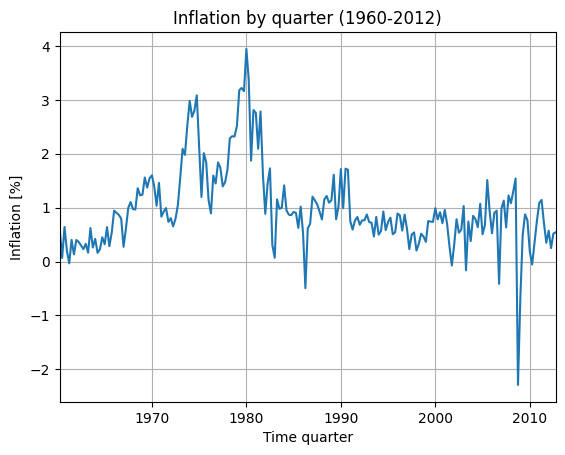

In [173]:
inf = df.inf.to_numpy()[1:]

plt.plot(df.DATE[1:], inf)
plt.title('Inflation by quarter (1960-2012)', fontsize=12)
plt.xlabel('Time quarter')
plt.ylabel('Inflation [%]')
plt.xlim(df.DATE[1], last_date)
plt.grid()
plt.show()

In [174]:
df.inf.min()

-2.2891346065978335

In [175]:
df.inf.describe()

count    211.000000
mean       0.985290
std        0.774504
min       -2.289135
25%        0.541995
50%        0.857677
75%        1.221306
max        3.945811
Name: inf, dtype: float64

In [176]:
min_inf_date = pd.Timestamp(df[df.inf == df.inf.min()].DATE.values[0]).date()
max_inf_date = pd.Timestamp(df[df.inf == df.inf.max()].DATE.values[0]).date()
print(f"Minimum inflation date: {min_inf_date}")
print(f"Maximum inflation date: {max_inf_date}")

Minimum inflation date: 2008-10-01
Maximum inflation date: 1980-01-01


We can observe a general tendency where the inflation is always around 1% by quarter. However, between 1970 and 1980 we find some **peaks of growth**, reaching a **maximum value of almost 4%** by quarter in **1980**. After some research, we may conclude that this was mainly due to oil crisis. Then, we find the **minimum peak in 2008**, probably due to the [collapse of Lehman Brothers](https://www.investopedia.com/articles/economics/09/lehman-brothers-collapse.asp#:~:text=Lehman%20Brothers%20filed%20for%20bankruptcy,the%20financial%20and%20investment%20world.).

<h3 style='color: #910c22;'>Question 2.3</h3>
<h4 style='color: #910c22;'>Interpréter l'autocorrélogramme et l'autocorrélogrammes partiels de inf. Quelle est la différence entre ces deux graphiques ?</h4>

The autocorrelogram for `inf` by definition is, given a `lag k`, the autocorrelation between the values of the series that are `k` intervals away.

*Observation: value for lag `k = 0` will always be `1`!*

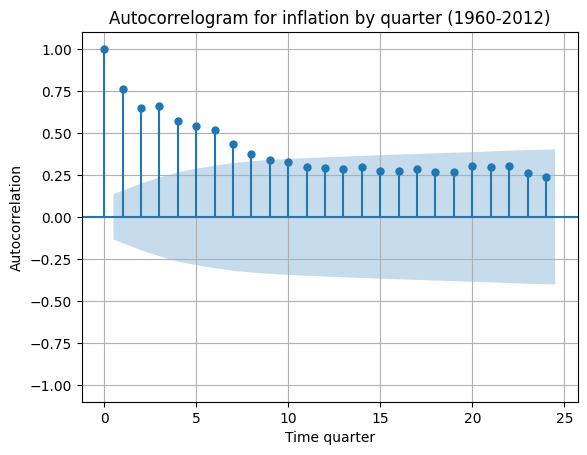

In [177]:
plot_acf(inf)
plt.title('Autocorrelogram for inflation by quarter (1960-2012)', fontsize=12)
plt.xlabel('Time quarter')
plt.ylabel('Autocorrelation')
plt.ylim(-1.1, 1.1)
plt.grid()
plt.show()

The values outside the blue region have a high statistical confidence (above 95%). We see that there is a high correlation for every value outside this region, in particular, for lag until `k=6` we find that the correlation is higher that 0.5.

Now we are interested in the partial autocorrelagram, that is the same as the autocorrelagram, but taking into account the values for intermediate intervals. This method allows us to mitigate the effects of the observations between `t` and `t - k` (`lag k`), removing indirect correlations included in the autocorrelogram.

*Observation: we can expect, by definition, that for lag `k = 0` and `k = 1`, values will be the same that the ones seen in the previous graphic.*

/home/mparafati/.local/lib/python3.10/site-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


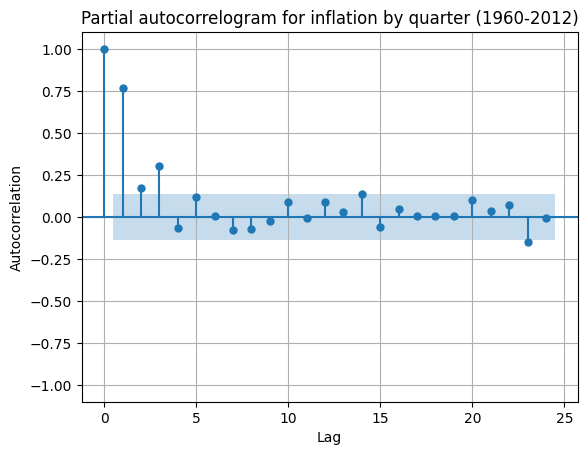

In [178]:
plot_pacf(inf)
plt.title('Partial autocorrelogram for inflation by quarter (1960-2012)', fontsize=12)
plt.xlabel('Lag')
plt.ylabel('Autocorrelation')
plt.ylim(-1.1, 1.1)
plt.grid()
plt.show()

By definition, for any Autoregressive model of order `k`, the partial autocorrelations are 0 for every lag beyond `k`. Given that, in our case, we have values until `k = 3` that are non-zero and outside the blue region (confidence over 95%), we can estimate that inflation can be predicted with a model of order `k = 3`.

<h3 style='color: #910c22;'>Question 2.4</h3>
<h4 style='color: #910c22;'>Quelle est la différence entre la stationnarité et l'ergodicité ? Pourquoi a-t-on besoin de ces deux conditions ?</h4>

In the context of stationary series, we have:

* A **stationary time series** if its properties do not depend on the time at which the series is observed. Future and past are similar.
* A **ergodicity time series** if its statistics can be deduced from any (large enough) random sample given from the process, meaning that they do not depend on the initial conditions.

We need these conditions to be true, since they are the **basic assumptions needed** to perform time series analysis. They are also needed to apply the *ergodic theorem*, which allows us to estimate the expectation of the process given the average of a sufficiently large sample.

<h3 style='color: #910c22;'>Question 2.5</h3>
<h4 style='color: #910c22;'>Proposer une modélisation AR(p) de inf, en utilisant tous les outils vus au cours.</h4>

We are building an Auto Regression model for inf, and we want to discover which is the order that maximizes likelihood. From question 3, we are expecting a value of 3 to be the optimal order. However, we are using [`ar_select_order`](https://www.statsmodels.org/devel/generated/statsmodels.tsa.ar_model.ar_select_order.html) from `statsmodel` API for Time Series to check the optimal lag value:

In [179]:
model = ARSelectOrder(inf, maxlag=10, glob=True)
model.ar_lags

[1, 3]

In [180]:
print(model.model.fit().summary())

                            AutoReg Model Results                             
Dep. Variable:                      y   No. Observations:                  211
Model:              Restr. AutoReg(3)   Log Likelihood                -138.549
Method:               Conditional MLE   S.D. of innovations              0.471
Date:                Sun, 11 Dec 2022   AIC                            285.099
Time:                        02:56:44   BIC                            298.449
Sample:                             3   HQIC                           290.497
                                  211                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1352      0.056      2.394      0.017       0.025       0.246
y.L1           0.5742      0.056     10.321      0.000       0.465       0.683
y.L3           0.2894      0.056      5.207      0.0

<h3 style='color: #910c22;'>Question 2.6</h3>
<h4 style='color: #910c22;'>Estimer le modèle de la courbe de Philips qui explique le taux de chômage (Unemp) en fonction du taux d’inflation courant et une constante.</h4>

In [181]:
df.head()

,DATE,FFR,Tbill,Tb1yr,r5,r10,PPINSA,Finished,CPI,CPICORE,...,M2SA,M2NSA,Unemp,IndProd,RGDP,Potent,Deflator,Curr,prev_CPI,inf
0,1960-01-01,3.93,3.87,4.57,4.64,4.49,31.67,33.20,29.40,18.92,...,896.1,299.40,5.13,23.93,2845.3,2824.2,18.521,31.830,NaN,NaN
1,1960-04-01,3.70,2.99,3.87,4.30,4.26,31.73,33.40,29.57,19.00,...,903.3,300.03,5.23,23.41,2832.0,2851.2,18.579,31.862,29.40,0.578231
2,1960-07-01,2.94,2.36,3.07,3.67,3.83,31.63,33.43,29.59,19.07,...,919.4,305.50,5.53,23.02,2836.6,2878.7,18.648,32.217,29.57,0.067636
3,1960-10-01,2.30,2.31,2.99,3.75,3.89,31.70,33.67,29.78,19.14,...,932.8,312.30,6.27,22.47,2800.2,2906.7,18.700,32.624,29.59,0.642109
4,1961-01-01,2.00,2.35,2.87,3.64,3.79,31.80,33.63,29.84,19.17,...,948.9,317.10,6.80,22.13,2816.9,2934.8,18.743,32.073,29.78,0.201478


We build a model as learned in the course:

In [182]:
unemp = df.Unemp[1:].to_numpy()
y = unemp
const = np.ones(y.shape)
X = np.column_stack((const, inf))

results = sm.OLS(y, X).fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.005
Method:                 Least Squares   F-statistic:                   0.01214
Date:                Sun, 11 Dec 2022   Prob (F-statistic):              0.912
Time:                        02:56:45   Log-Likelihood:                -400.28
No. Observations:                 211   AIC:                             804.6
Df Residuals:                     209   BIC:                             811.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          6.0708      0.181     33.576      0.0

The estimated model would be:
$$Unemp = 6.0708 + 0.0159 Inf$$

<h3 style='color: #910c22;'>Question 2.7</h3>
<h4 style='color: #910c22;'>Tester l’autocorrélation des erreurs.</h4>

We will first plot the residuals and their autocorrelagram:

In [183]:
res = results.resid

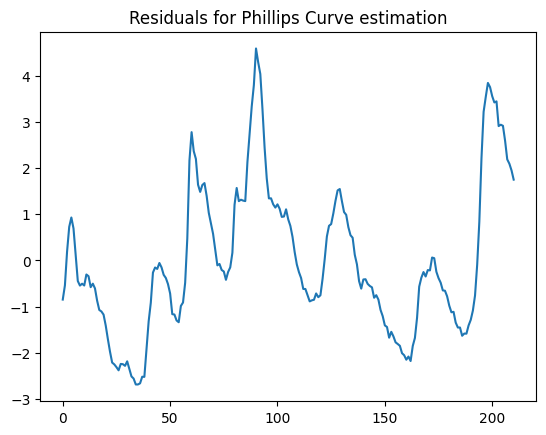

In [184]:
plt.plot(res)
plt.title('Residuals for Phillips Curve estimation', fontsize=12)
plt.show()

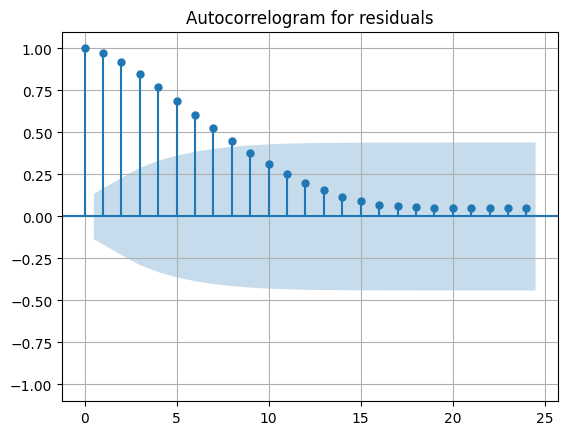

In [185]:
plot_acf(res)
plt.title('Autocorrelogram for residuals', fontsize=12)
plt.ylim(-1.1, 1.1)
plt.grid()
plt.show()

From this graphic, we can already see that they seem to be autocorrelated. Now let's confirm this theory using the course results. We know that for a model `AR(1)`, residuals can be written as:
$$u_t = \rho u_{t - 1} + e_t $$

Then, we can set our hypothesis:
$$H_0 : { \rho = 0 };\quad H_1 : { \rho \neq 0 }$$

We build then our model `AR(1)` for the residuals of the Phillips Curve estimation from previous question:

In [186]:
res_model = AutoReg(res, lags=1)
res_results = res_model.fit()
res_results.pvalues

array([0.60058705, 0.        ])


We observe that the p-value for $\rho$ is (approximately) 0, so we reject the null hypothesis that errors are serially uncorrelated at 5%, to conclude that **they are autocorrelated**.

<h3 style='color: #910c22;'>Question 2.8</h3>
<h4 style='color: #910c22;'>Corriger l’autocorrélation des erreurs par la méthode vue en cours.</h4>

We will correct this problem building the following model, from course results:

$$y_t - \rho y_{t - 1} = (1 - \rho)\beta_0 + \beta_1(x_t - \rho x_{t-1}) + e_t, \quad t \geq 2$$

Renaming:
$$\tilde{y_t} = y_t - \rho y_{t - 1}$$
$$\tilde{x_t} = x_t - \rho x_{t-1}$$

We have:

$$\tilde{y_t} = (1 - \rho)\beta_0 + \beta_1\tilde{x_t} + e_t, \quad t \geq 2$$

In [196]:
# Create needed variables
rho = res_results.params[1]
y = unemp
x = inf
y_hat = y[1:] - rho * y[:-1]
x_hat = x[1:] - rho * x[:-1]
const = np.ones(len(y_hat))
X_hat = np.column_stack((const - rho, x_hat))

In [197]:
# Model with corrected variables
results = sm.OLS(y_hat, X_hat).fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.024
Model:                            OLS   Adj. R-squared:                  0.020
Method:                 Least Squares   F-statistic:                     5.203
Date:                Sun, 11 Dec 2022   Prob (F-statistic):             0.0236
Time:                        03:01:16   Log-Likelihood:                -66.797
No. Observations:                 210   AIC:                             137.6
Df Residuals:                     208   BIC:                             144.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             6.7936      1.152      5.899      0.0

And we can confirm that this model reduces autocorrelation by comparing with a new autocorrelogram:

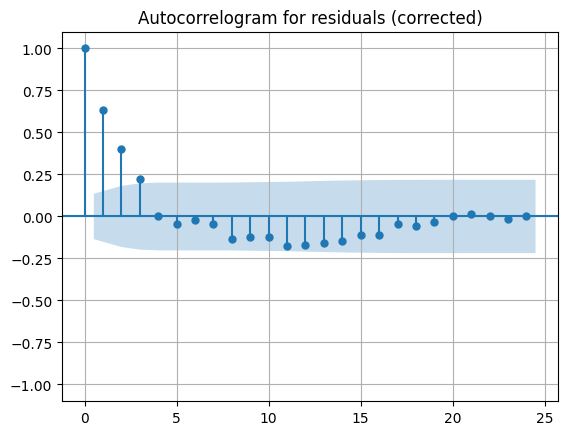

In [202]:
res = results.resid
plot_acf(res)
plt.title('Autocorrelogram for residuals (corrected)', fontsize=12)
plt.ylim(-1.1, 1.1)
plt.grid()
plt.show()

<h3 style='color: #910c22;'>Question 2.9</h3>
<h4 style='color: #910c22;'>Tester la stabilité de la relation chômage-inflation sur deux sous-périodes de taille identique (test de changement de structure avant et après la moitié de la période d’observation).</h4>

First we will create our subsamples:

In [209]:
assert len(inf) == len(unemp)
inf_1, inf_2 = np.array_split(inf, 2)
unemp_1, unemp_2 = np.array_split(unemp, 2)

We will perform a Chow test, to reject our null hypothesis:

$$H_0 \quad : \quad \text{"splitting the sample and fitting each subsample does not improve the results"}$$

*For coding facility, we write the whole process of fitting and correcting the residuals autocorrelation problem in a function:*

In [226]:
def fit_corrected_phillips_model(x, y):
    ## Model
    const = np.ones(y.shape)
    X = np.column_stack((const, x))
    results = sm.OLS(y, X).fit()

    ## Residuals autocorrelation correction
    res = results.resid
    res_model = AutoReg(res, lags=1)
    res_results = res_model.fit()
    rho = res_results.params[1]
    y_hat = y[1:] - rho * y[:-1]
    x_hat = x[1:] - rho * x[:-1]
    const = np.ones(len(y_hat))
    X_hat = np.column_stack((const - rho, x_hat))

    return sm.OLS(y_hat, X_hat).fit()

We get the SSRs:

In [229]:
SSR0 = fit_corrected_phillips_model(inf, unemp).ssr
SSR1 = fit_corrected_phillips_model(inf_1, unemp_1).ssr
SSR2 = fit_corrected_phillips_model(inf_2, unemp_2).ssr
print(f"SSR with whole sample: {SSR0}")
print(f"SSR for first subsample: {SSR1}")
print(f"SSR for second subsample: {SSR2}")

SSR with whole sample: 23.228733673653537
SSR for first subsample: 13.591902095456348
SSR for second subsample: 8.78549520917094


And now we use these SSRs to apply the Chow test, using its Fisher statistic.
We have $k = 2$ since we have two explanatory variables, and $n$ is the total number of samples.

In [236]:
n = len(inf)
k = 2
F = ((SSR0 - (SSR1 + SSR2)) / k) / ((SSR1 + SSR2) / (n - 2 * k))
print(f"F-statistic for Chow test: {F}")

F-statistic for Chow test: 3.937603332269405


And getting the p-value we can decide if we reject or not:

In [238]:
p_v = f.sf(F, k, n - 2 * k)
print(f"p-value: {p_v}")

p-value: 0.020972390686846358


As $p\_value \lt 5\%$, we reject the null hypothesis, concluding that **the model is not stable throughout time**.

<h3 style='color: #910c22;'>Question 2.10</h3>
<h4 style='color: #910c22;'>Estimer la courbe de Philips en supprimant l'inflation courante des variables explicatives mais en ajoutant les délais d’ordre 1, 2, 3 et 4 de l’inflation et du chômage. Faire le test de
Granger de non causalité de l’inflation sur le chômage. Donnez la p-valeur.</h4>

We first build the requested model (unrestricted model for the later test to be done):

In [263]:
def lag_values(values, max_lag):
    lagged = {}
    for lag in range(1, max_lag + 1):
        lagged[lag] = values[(max_lag - lag):-lag]
    
    return lagged

In [267]:
max_lag = 4
lagged_infs = lag_values(inf, max_lag)
lagged_unemps = lag_values(unemp, max_lag)
n = len(inf) - max_lag
const = np.ones(n)
y = unemp[max_lag:]

In [279]:
# Unrestricted model

X_ur = np.column_stack(
    (const,
     lagged_infs[1],
     lagged_infs[2],
     lagged_infs[3],
     lagged_infs[4],
     lagged_unemps[1],
     lagged_unemps[2],
     lagged_unemps[3],
     lagged_unemps[4]
    )
)
k_ur = X_ur.shape[1]

results_ur = sm.OLS(y, X_ur).fit()
print(results_ur.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.979
Model:                            OLS   Adj. R-squared:                  0.978
Method:                 Least Squares   F-statistic:                     1145.
Date:                Sun, 11 Dec 2022   Prob (F-statistic):          2.80e-161
Time:                        04:06:55   Log-Likelihood:                 4.6497
No. Observations:                 207   AIC:                             8.701
Df Residuals:                     198   BIC:                             38.70
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1457      0.072      2.014      0.0

We observe that every lagged value for inf (x1, x2, x3, x4) has a **p-value greater than 0.05**, meaning they are significative at a 5% level.

Now we can do the Granger test by creating a restricted model (without inflation) and then computing the F-statistic to see if we can reject the null hypothesis (in this case, "previous lagged values from inflation do not improve our fitting results") by checking the p-value:

In [280]:
# Restricted model

X_r = np.column_stack(
    (const,
     lagged_unemps[1],
     lagged_unemps[2],
     lagged_unemps[3],
     lagged_unemps[4]
    )
)
k_r = X_r.shape[1]

results_r = sm.OLS(y, X_r).fit()

In [283]:
# Test

SSR_ur = results_ur.ssr
SSR_r = results_r.ssr

F = ((SSR_r - SSR_ur) / (k_ur - k_r)) / ((SSR_ur) / (n - k_ur))
print(f"F-statistic for Granger test: {F}")

p_v = f.sf(F, k_ur - k_r, n - k_ur)
print(f"p-value: {p_v}")

F-statistic for Granger test: 3.796699198205276
p-value: 0.005351957807937583


As $p\_value \lt 5\%$, we can reject the null hypothesis, therefore accepting that the inflation lagged values improves the fitting. So, we conclude that we have causality between these lagged values from inflation and unemployement.

<h3 style='color: #910c22;'>Question 2.11</h3>
<h4 style='color: #910c22;'>Représentez graphiquement les délais distribués et commentez. Calculer l’impact à long de terme de l’inflation sur le chômage.</h4>

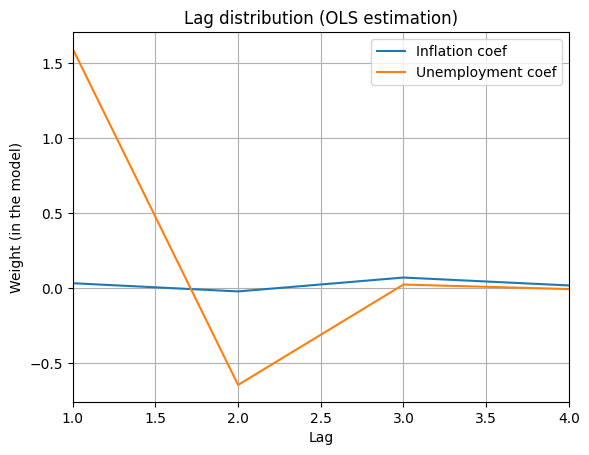

In [294]:
lags = np.arange(1, max_lag + 1)
b_inf = results_ur.params[1:5]
b_unemp = results_ur.params[5:]

plt.plot(lags, b_inf, label="Inflation coef")
plt.plot(lags, b_unemp, label="Unemployment coef")
plt.title('Lag distribution (OLS estimation)', fontsize=12)
plt.xlabel('Lag')
plt.ylabel('Weight (in the model)')
plt.xlim(lags[0], lags[-1])
plt.grid()
plt.legend()
plt.show()

As can be seen in the graph, the variation in the previous unemployment values has much more impact than the variation in the previous inflation values (which is logical and expected).

To calculate the long-term impact, we can add all the coefficients for the different values of inflation lag:

In [295]:
print(f"Long-term impact of inflation on unemployment: {sum(b_inf)}")

Long-term impact of inflation on unemployment: 0.09280567909911851
